<a href="https://colab.research.google.com/github/pquynhvu/TDA/blob/main/mnist_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.initializers import Constant
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau
keras.layers.Layer.weights
import seaborn as sns
from sklearn.metrics import confusion_matrix
from scipy.signal import convolve2d

In [2]:
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
class_labels = list(set(y_train))
# add color channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
# normalize
x_train, x_test = x_train/255.0, x_test/255.0
# one-hot encoding
label_train, label_test = to_categorical(y_train), to_categorical(y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


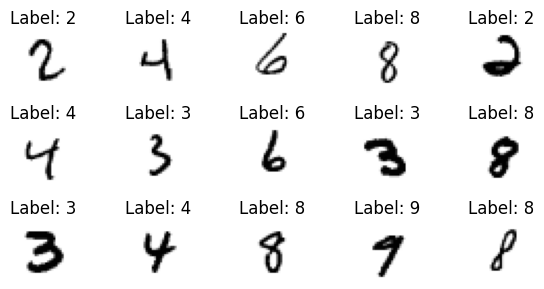

In [4]:
num_row, num_col = 3, 5

idx_10 = np.random.randint(low=0, high=x_train.shape[0], size=(num_row*num_col,))
x_train_10, y_train_10 = x_train[idx_10], y_train[idx_10]

# visualize
fig, axs = plt.subplots(num_row, num_col, figsize=(6, 3))
for i, ax in enumerate(axs.flatten()):
    ax.set_title(('Label: {}'.format(y_train_10[i])))
    ax.imshow(x_train_10[i], cmap=plt.cm.binary)
    ax.axis('off')
plt.tight_layout()
plt.show()

Ref: https://cs231n.github.io/convolutional-networks/ for number of padding/dimension

In [5]:
num_filter = [2, 1]
iter = 10000
bias = np.random.normal(loc=0.0, scale=1.0, size=len(num_filter))

mnist_cnn = models.Sequential() # initialize model
mnist_cnn.add(Conv2D(filters = num_filter[0],
                     kernel_size = (3,3),
                     padding = 'same',
                     strides=(1,1),
                     bias_initializer=Constant(bias[0]),
                     activation="sigmoid",
                     input_shape = (28,28,1)))
mnist_cnn.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))
mnist_cnn.add(Conv2D(filters = num_filter[1],
                     kernel_size = (2,2),
                     padding = 'Same',
                     strides=(1,1),
                     bias_initializer=Constant(bias[1]),
                     activation ='sigmoid'))
mnist_cnn.add(MaxPool2D(pool_size=(2,2), strides=(2,2))) # strides = (1,1)
mnist_cnn.add(Flatten())
mnist_cnn.add(Dense(10, activation = "softmax"))
mnist_cnn.compile(optimizer = "sgd", loss = "categorical_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# CNN

In [6]:
mnist_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 2)           │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 2)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 27, 1)           │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 169)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           1,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,729 (6.75 KB)

 Trainable params: 1,729 (6.75 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
mnist_cnn_fit = mnist_cnn.fit(x_train, label_train, epochs = 60, batch_size = 250)

Epoch 1/60
240/240 ━━━━━━━━━━━━━━━━━━━━ 24s 95ms/step - accuracy: 0.1107 - loss: 2.3898
Epoch 2/60
240/240 ━━━━━━━━━━━━━━━━━━━━ 41s 95ms/step - accuracy: 0.1138 - loss: 2.2972
Epoch 3/60
240/240 ━━━━━━━━━━━━━━━━━━━━ 40s 93ms/step - accuracy: 0.1150 - loss: 2.2950
Epoch 4/60
240/240 ━━━━━━━━━━━━━━━━━━━━ 42s 96ms/step - accuracy: 0.1297 - loss: 2.2919
Epoch 5/60
240/240 ━━━━━━━━━━━━━━━━━━━━ 41s 95ms/step - accuracy: 0.1300 - loss: 2.2871
Epoch 6/60
240/240 ━━━━━━━━━━━━━━━━━━━━ 41s 95ms/step - accuracy: 0.1437 - loss: 2.2800
Epoch 7/60
240/240 ━━━━━━━━━━━━━━━━━━━━ 41s 96ms/step - accuracy: 0.1729 - loss: 2.2689
Epoch 8/60
240/240 ━━━━━━━━━━━━━━━━━━━━ 22s 92ms/step - accuracy: 0.2761 - loss: 2.2509
Epoch 9/60
240/240 ━━━━━━━━━━━━━━━━━━━━ 42s 96ms/step - accuracy: 0.3871 - loss: 2.2185
Epoch 10/60
240/240 ━━━━━━━━━━━━━━━━━━━━ 41s 95ms/step - accuracy: 0.4867 - loss: 2.1568
Epoch 11/60
240/240 ━━━━━━━━━━━━━━━━━━━━ 42s 101ms/step - accuracy: 0.5840 - loss: 2.0337
Epoch 12/60
240/240 ━━━━━━━━━

In [8]:
layer_names = [layer.name for layer in mnist_cnn.layers]
layer_names

['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense']

In [20]:
conv1_W, conv1_b = mnist_cnn.layers[layer_names.index('conv2d')].get_weights()
conv2_W, conv2_b = mnist_cnn.layers[layer_names.index('conv2d_1')].get_weights()
dense_W, dense_b = mnist_cnn.layers[layer_names.index('dense')].get_weights()

In [18]:
dense_W.shape

(169, 10)

In [10]:
def same_padding(images, filter_h, filter_w, stride):
    sample_size, img_h, img_w, _ = images.shape
    stride_h, stride_w = stride

    pad_h = ((stride_h-1)*img_h + filter_h - stride_h) // 2
    pad_w = ((stride_w-1)*img_w + filter_w - stride_w) // 2

    output = []
    for n in range(sample_size):
      padded_img = np.pad(images[n,:,:,:], ((pad_h, pad_h), (pad_w, pad_w), (0,0)), mode='constant', constant_values=0)
      output.append(padded_img)

    return np.array(output)

In [11]:
def get_start_index(output_height, output_width, stride_height, stride_width, kernel_height, kernel_width):
    h_start, h_end, w_start, w_end = [], [], [], []
    i, j = 0, 0

    while i <= output_height and j <= output_width:
        h_start_value = i*stride_height
        h_end_value = h_start_value + kernel_height
        w_start_value = j*stride_width
        w_end_value = w_start_value + kernel_width
        if h_end_value <= output_height or w_end_value <= output_width:
           h_start.append(h_start_value)
           #h_end.append(h_end_value)
           w_start.append(w_start_value)
           #w_end.append(w_end_value)
        i+=1
        j+=1
    return h_start, w_start

In [12]:
def reLU(images):
  return np.maximum(0, images)

def sigmoid(images):
	return 1.0 / (1.0 + np.exp(-images))

def softmax(images):
  sample_size, num_classes = images.shape
  max_idx = []

  for n in range(sample_size):
    exp_x = np.exp(images[n] - np.max(images[n]))
    p = exp_x/exp_x.sum()
    max_idx.append(np.argmax(p))
  return np.array(max_idx)

In [13]:
def Convo2D(images, filters, stride, bias, padding):
    filter_h, filter_w, in_channels, out_channels = filters.shape

    if padding:
      img_padded = same_padding(images, filter_h, filter_w, stride)
    else:
      img_padded = images

    sample_size, input_h, input_w, channels = img_padded.shape
    stride_h, stride_w = stride
    output_h = input_h - filter_h + 1
    output_w = input_w - filter_w + 1
    convo_img = np.empty((sample_size, output_h, output_w, out_channels))

    for i in range(output_w):
        for j in range(output_h):
            h_start_idx = i*stride_h
            w_start_idx = j*stride_w
            sub_img = img_padded[:, h_start_idx:(h_start_idx+filter_h), w_start_idx:(w_start_idx+filter_w)]

            for f in range(out_channels):
                res = np.sum(sub_img * filters[:,:,:, f], axis=(1, 2, 3)) + bias[f]
                convo_img[:, i, j, f] = res

    return sigmoid(convo_img)

In [14]:
def max_pooling(images, pool_size, stride):
    sample_size, input_h, input_w, channels = images.shape
    kernel_h, kernel_w = pool_size
    stride_h, stride_w = stride

    output_w = (input_w - kernel_w) // stride_w + 1
    output_h = (input_h - kernel_h) // stride_h + 1
    pooled_img = np.empty((sample_size, output_h, output_w, channels))

    for n in range(sample_size):
        sub_img = images[n]
        for c in range(channels):
          for i in range(output_h):
            for j in range(output_w):
                h_start_idx = i*stride_h
                w_start_idx = j*stride_w
                subsection = sub_img[h_start_idx:(h_start_idx+kernel_h), w_start_idx:(w_start_idx+kernel_w), c]
                pooled_img[n, i, j, c] = np.max(subsection)

    return pooled_img

In [15]:
def dense_layer(images, weights, bias):
  sample_size = images.shape[0]
  img_flattened = images.reshape(sample_size, -1)
  output = np.dot(img_flattened, weights) + bias
  return output

In [21]:
convo1_out = Convo2D(x_test, filters=conv1_W, stride=(1,1), bias = conv1_b, padding=True)
convo1_maxpool = max_pooling(convo1_out, pool_size=(2,2), stride=(1,1))
convo2_out = Convo2D(convo1_maxpool, filters=conv2_W, stride=(1,1), bias = conv2_b, padding=True)
convo2_maxpool = max_pooling(convo2_out, pool_size=(2,2), stride=(2,2))
dense_out = dense_layer(convo2_maxpool, weights=dense_W, bias=dense_b)
pred_classes = softmax(dense_out)

In [22]:
np.mean(pred_classes == y_test)

0.8957

In [39]:
def plot_images(data, predicted_labels, true_labels, nrows=0, images_per_row=0, wspace=0.3, hspace=0.3):
    fig, axes = plt.subplots(nrows, images_per_row, figsize=(10, 6))
    axes = axes.ravel()

    for idx in range(nrows * images_per_row):
        ax = axes[idx]
        image = data[idx]
        ax.imshow(image, cmap=plt.cm.binary)
        ax.set_title(f"Predicted {predicted_labels[idx]} - True {true_labels[idx]}")
        ax.axis('off')

    plt.subplots_adjust(wspace=wspace, hspace=hspace)
    plt.tight_layout()
    plt.show()

[7 2 1 0 4 9 5 6 3 8] [7 2 1 0 4 9 6 6 6 8]


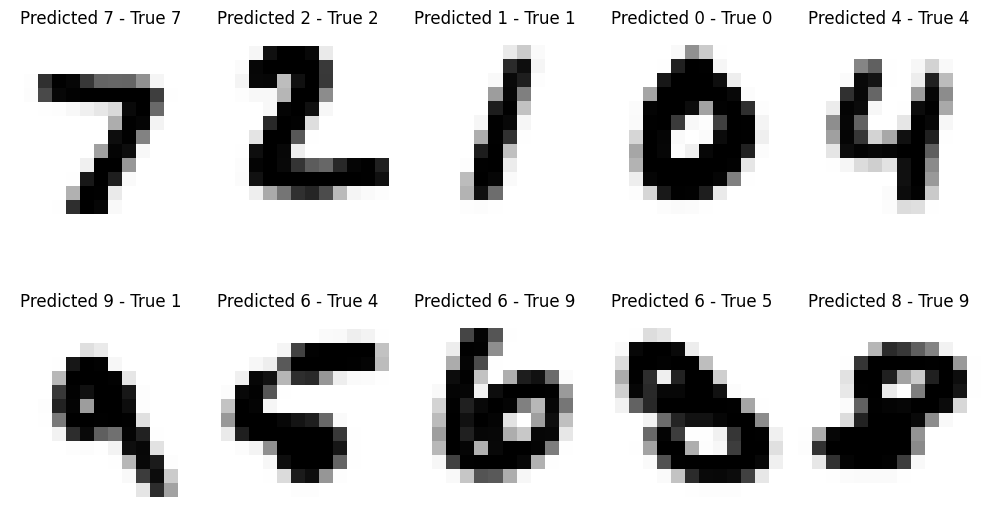

In [40]:
first_indices = {}
for i, val in enumerate(y_test):
    if val not in first_indices:
        first_indices[val] = i

idx = np.array(list(first_indices.values()))
print(y_test[idx], pred_classes[idx])

x_cnn_sampled = convo2_maxpool[idx]
pred_label = pred_classes[idx]
plot_images(x_cnn_sampled, pred_label, y_test, 2, 5, wspace=100, hspace=10)

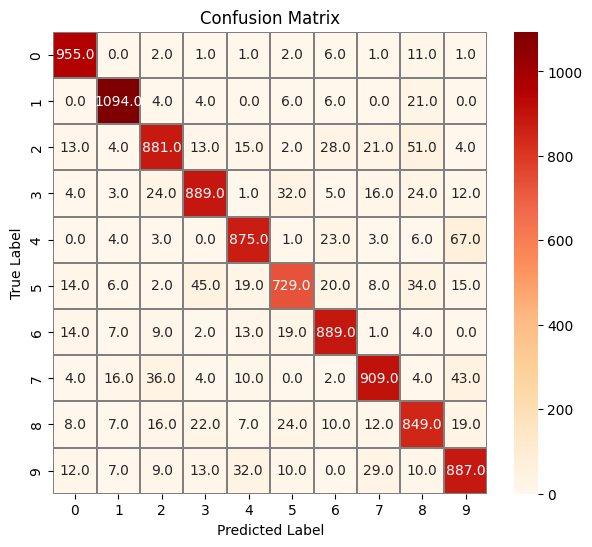

In [41]:
cm = confusion_matrix(y_test, pred_classes)
f,ax = plt.subplots(figsize=(7, 6))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="OrRd",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# TDA

In [42]:
!pip install gudhi
import gudhi as gd
from collections import defaultdict
from joblib import Parallel, delayed

In [43]:
cnn_img = convo2_maxpool.squeeze()
n = cnn_img.shape[0]

pers = []
for i in range(n):
    cubical_complex = gd.CubicalComplex(top_dimensional_cells=cnn_img[i])
    cubical_pers = cubical_complex.persistence()
    pers.append(cubical_pers)

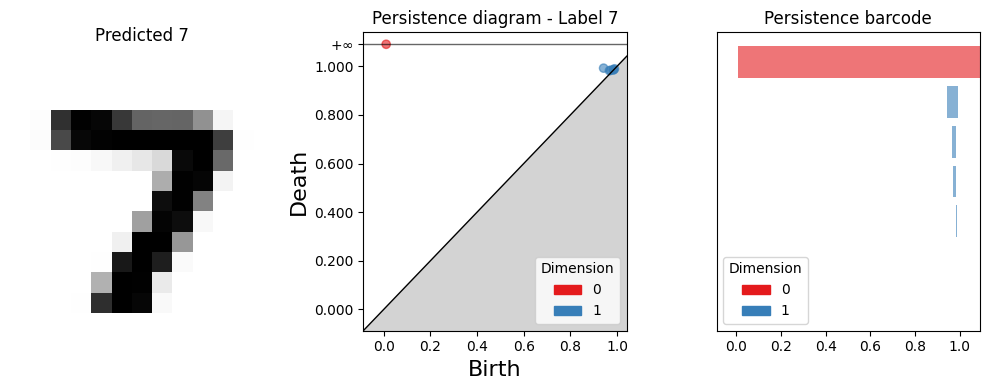

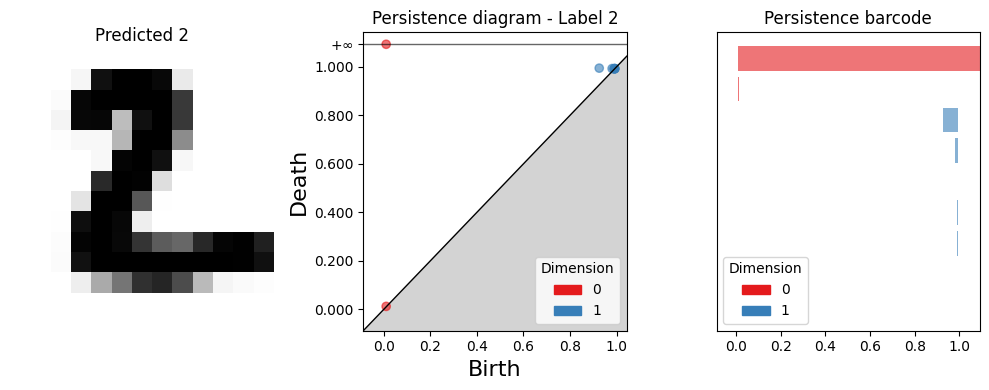

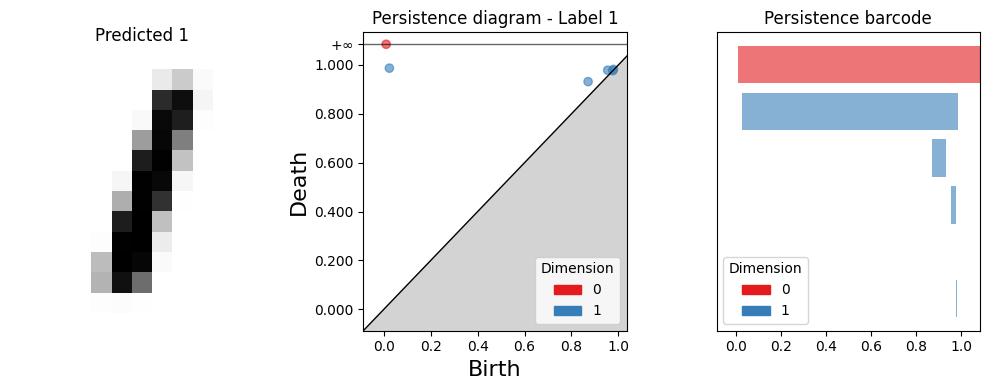

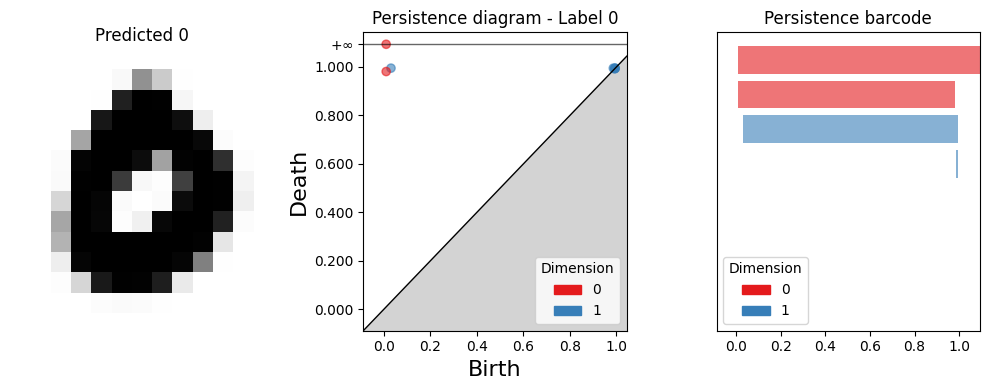

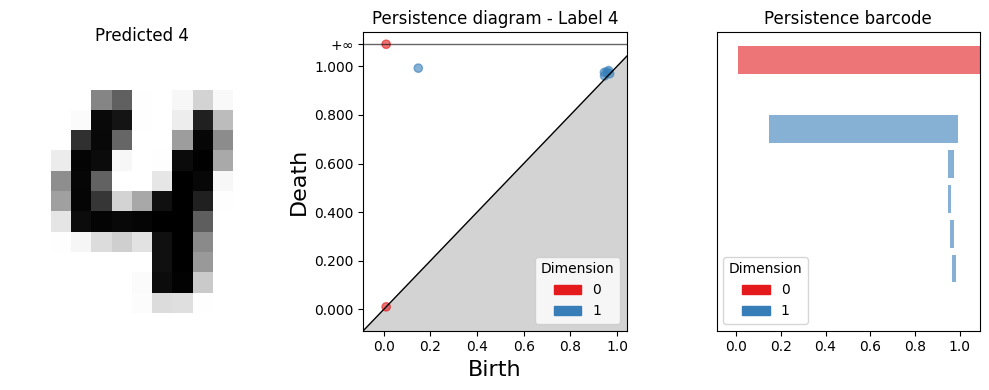

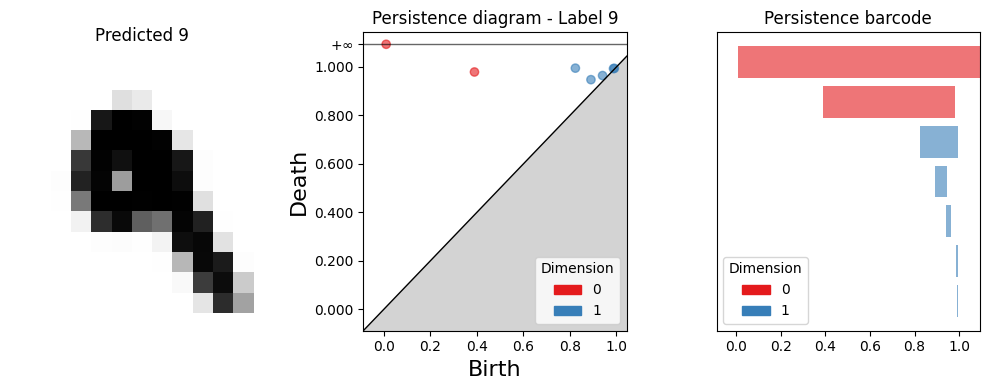

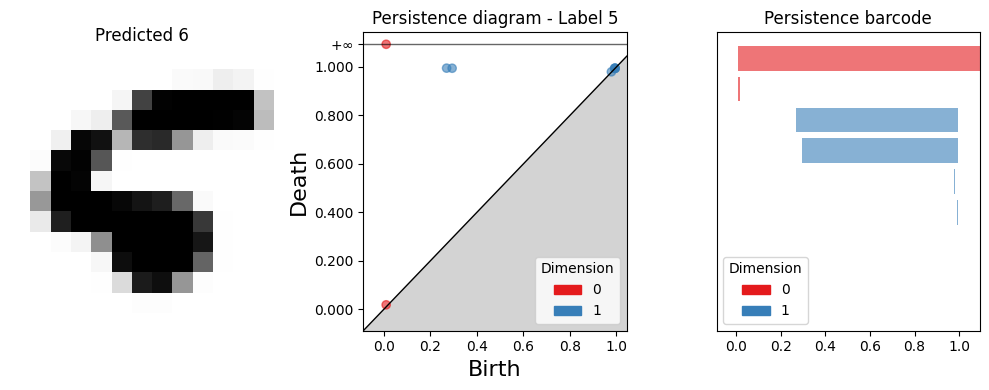

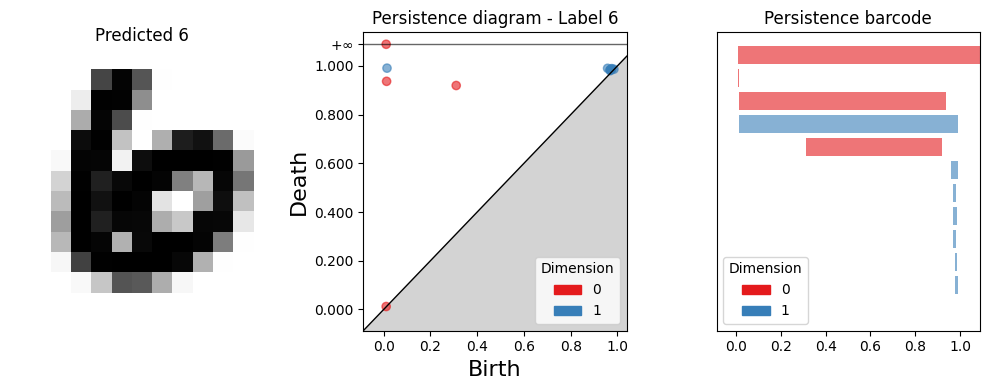

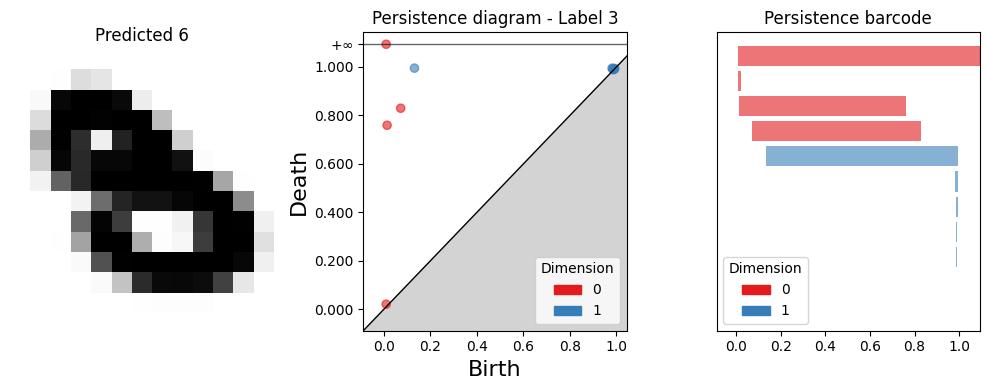

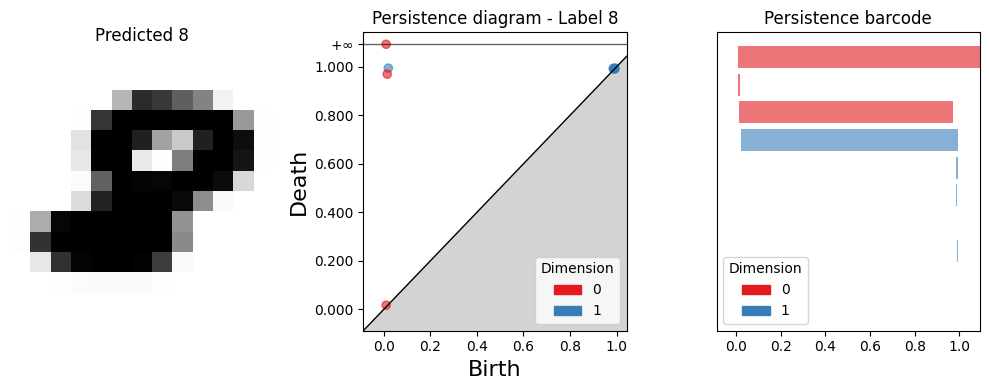

In [56]:
num_row, img_per_row = 10, 3
for i in range(num_row):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

    axes[0].imshow(cnn_img[idx[i]], cmap=plt.cm.binary)
    axes[0].set_title(f"Predicted {pred_classes[idx[i]]}")
    axes[0].axis('off')

    gd.plot_persistence_diagram(persistence=pers[idx[i]], axes=axes[1])
    axes[1].set_title(f'Persistence diagram - Label {y_test[idx[i]]}')

    gd.plot_persistence_barcode(persistence=pers[idx[i]], axes=axes[2])
    axes[2].set_title(f'Persistence barcode')

    plt.tight_layout()
    plt.show()

In [57]:
def sort_and_group(labels, pers_data):
  grouped_pers_data = defaultdict(list)

  for y, d in zip(labels, pers_data):
    grouped_pers_data[y].append(d)

  sorted_grouped_pers_data = sorted(grouped_pers_data.items())

  sorted_labels = []
  sorted_pers_data = []

  for y_val, grouped_lists in sorted_grouped_pers_data:
      for sublist in grouped_lists:
          sorted_labels.append(y_val)
          sorted_pers_data.append(sublist)

  return np.array(sorted_labels), sorted_pers_data

In [58]:
unique_labels = np.unique(y_test)
sorted_y_test, sorted_pers = sort_and_group(y_test, pers)
sample_size = 100
selected_idx = []

for label in unique_labels:
    indices = np.where(sorted_y_test == label)[0]
    selected_idx.extend(indices[:sample_size])

selected_indices = np.array(selected_idx, dtype=int)
selected_labels = sorted_y_test[selected_indices]

In [ ]:
pers_subset = []
for i in range(len(selected_indices)):
  pers_subset.append(pers[selected_indices[i]])

l = len(pers_subset)
B0 = np.zeros((l, l))

barcode = []
for i in range(l):
    pers_data = pers_subset[i]
    barcode.append([(birth, death) for _, (birth, death) in pers_data])

In [ ]:
def get_persistence_pairs(data_sets):
    H0_list = []  # List to store H0 pairs per image
    H1_list = []  # List to store H1 pairs per image

    for data in data_sets:
        # Separate H0 and H1 for each image
        H0_list.append([(birth, death) for dim, (birth, death) in data if dim == 0])
        H1_list.append([(birth, death) for dim, (birth, death) in data if dim == 1])

    return H0_list, H1_list

In [ ]:
H0_list, H1_list = get_persistence_pairs(pers_subset)

In [ ]:
for i in range(l):
    for j in range(i):
        B0[i,j] = gd.bottleneck_distance(barcode[i], barcode[j])

B0 = B0 + B0.transpose()

In [ ]:
def plot_distance_matrix(matrix, title="Distance Matrix", labels=None):
    plt.figure(figsize=(8,6))
    if labels is not None:
        sns.heatmap(matrix, annot=True, fmt=".2f", xticklabels=labels, yticklabels=labels, cmap="viridis")
    else:
        sns.heatmap(matrix, annot=True, fmt=".2f", cmap="viridis")
    plt.title(title)
    plt.xlabel("Samples")
    plt.ylabel("Samples")
    plt.show()

In [ ]:
B0

array([[0.        , 0.08340539, 0.96398279, ..., 0.97185968, 0.63303045,
        0.84338733],
       [0.08340539, 0.        , 0.96398279, ..., 0.97185968, 0.63303045,
        0.84338733],
       [0.96398279, 0.96398279, 0.        , ..., 0.51685189, 0.68751308,
        0.41431823],
       ...,
       [0.97185968, 0.97185968, 0.51685189, ..., 0.        , 0.69529073,
        0.26661217],
       [0.63303045, 0.63303045, 0.68751308, ..., 0.69529073, 0.        ,
        0.42867856],
       [0.84338733, 0.84338733, 0.41431823, ..., 0.26661217, 0.42867856,
        0.        ]])

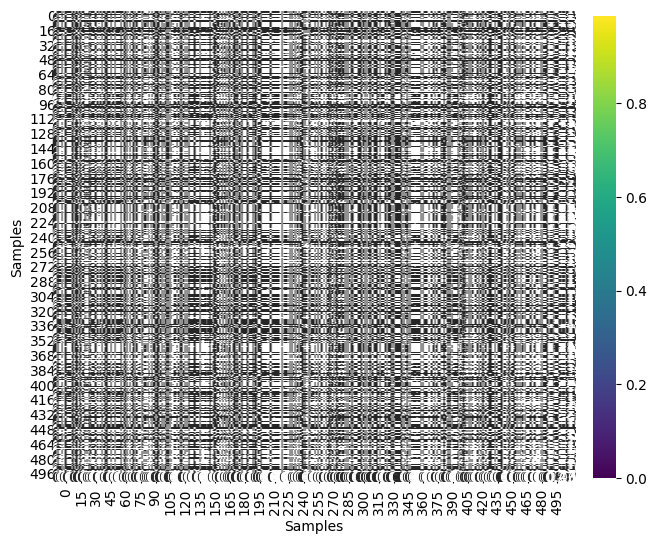

In [ ]:
plot_distance_matrix(B0, title="")

In [ ]:
l = len(pers_subset)
H0_distance = np.zeros((l, l))

for i in range(l):
    for j in range(i):
        H0_distance[i,j] = gd.bottleneck_distance(H0_list[i], H0_list[j])

H0_distance = H0_distance + H0_distance.transpose()

In [ ]:
H0_distance

array([[0.00000000e+00, 1.28835342e-02, 7.06026931e-05, ...,
        4.85929839e-01, 0.00000000e+00, 4.21693665e-01],
       [1.28835342e-02, 0.00000000e+00, 1.28835342e-02, ...,
        4.85929839e-01, 1.28835342e-02, 4.21693665e-01],
       [7.06026931e-05, 1.28835342e-02, 0.00000000e+00, ...,
        4.85929839e-01, 7.06026931e-05, 4.21693665e-01],
       ...,
       [4.85929839e-01, 4.85929839e-01, 4.85929839e-01, ...,
        0.00000000e+00, 4.85929839e-01, 1.33306084e-01],
       [0.00000000e+00, 1.28835342e-02, 7.06026931e-05, ...,
        4.85929839e-01, 0.00000000e+00, 4.21693665e-01],
       [4.21693665e-01, 4.21693665e-01, 4.21693665e-01, ...,
        1.33306084e-01, 4.21693665e-01, 0.00000000e+00]])

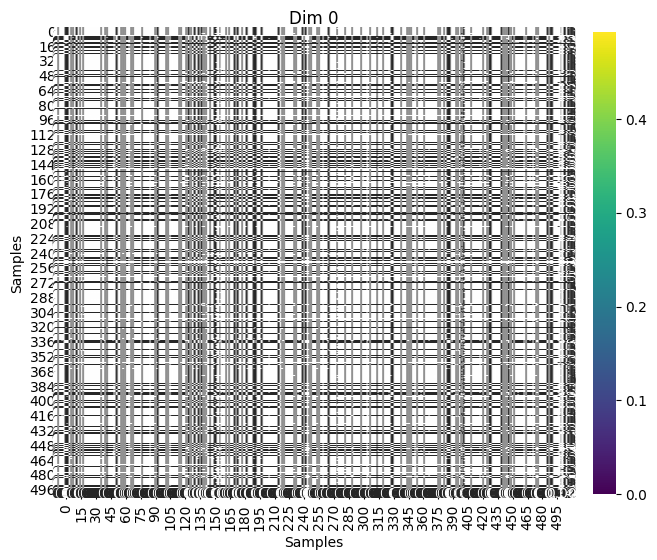

In [ ]:
plot_distance_matrix(H0_distance, title="Dim 0")

In [ ]:
l = len(pers_subset)
H1_distance = np.zeros((l, l))

for i in range(l):
    for j in range(i):
        H1_distance[i,j] = gd.bottleneck_distance(H1_list[i], H1_list[j])

H1_distance = H1_distance + H1_distance.transpose()

In [ ]:
H1_distance

array([[0.        , 0.04170269, 0.4819914 , ..., 0.25842595, 0.31651523,
        0.20715911],
       [0.04170269, 0.        , 0.4819914 , ..., 0.25842595, 0.31651523,
        0.20715911],
       [0.4819914 , 0.4819914 , 0.        , ..., 0.46003253, 0.34375654,
        0.4819914 ],
       ...,
       [0.25842595, 0.25842595, 0.46003253, ..., 0.        , 0.11627599,
        0.1028329 ],
       [0.31651523, 0.31651523, 0.34375654, ..., 0.11627599, 0.        ,
        0.21910889],
       [0.20715911, 0.20715911, 0.4819914 , ..., 0.1028329 , 0.21910889,
        0.        ]])

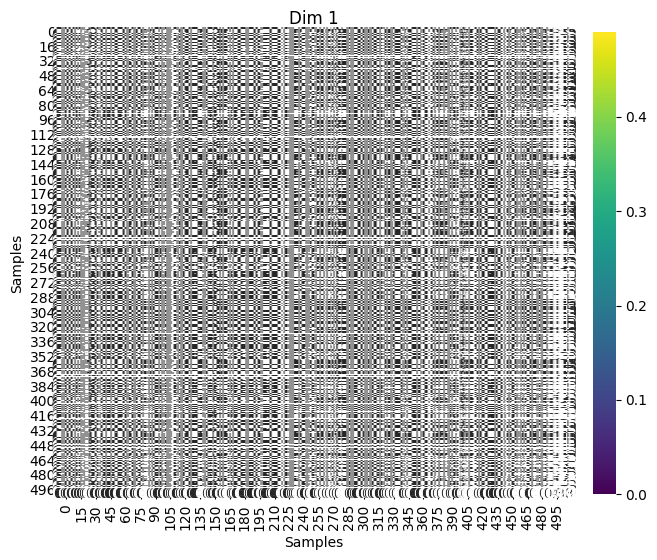

In [ ]:
plot_distance_matrix(H1_distance, title="Dim 1")

In [ ]:
!pip install nibabel
import nibabel